# Capstone 2 Project
by Hans Darmawan - JCDS2602

# Background

The New York City Taxi and Limousine Commission (known as TLC) is an agency that has been in charge of rules since 1971. Their job is to rule over the car and for-hire vehicle businesses in New York City. The fundamental goal of TLC is to make sure the limousine and taxi services are open to all visitors and residents, safe, dependable. And to fulfill this goal, they regulate things such as pricing, license giving to automobiles and taxi drivers, policy observance, and protection of consumer rights. They also gather and analyze data on ride-hailing and taxi companies to enable authorities to decide on policies and raise the quality of service.

In this particular domains, tipping is an important part of customer service, where it influences drivers" income. Trip records those contains information such like fare amounts, trip distances, payment methods, etc. represents the whole picture of tipping behavior. By understanding how tips are distributed across transactions, it will help the company to determine the level of customer satisfaction and the quality of services.

# Gap Analysis

There is a gap in terms of understanding consumer attitudes towards tipping behavior in the context of ride-sharing services compared to traditional taxi services. The TLC gains a lot of trip record data. Although the data are collected, it doesn"t represent things like service quality, ride experience, and how fares are set up affect how people tip. Lack of knowledge regarding trends in driver pay and customer satisfaction makes the company unable to adequately view them. Without a solid understanding of people"s feelings about tipping, they will also be unable to craft tailored laws that cater to the demands of both drivers and passengers. This means the company may overlook opportunities to enhance service and assist drivers in earning more money generally.

# Problem Statement

The company has a challenge in terms of their lack of knowledge about what people feel about tips when they use ride-sharing systems instead of taxis. This makes it harder to figure out how people tip, which could slow down the process of making fair plans for driver pay. Without knowing this, rules won"t satisfy drivers and passengers. At the end, the company"s decision-making can"t work to make New York City"s public transportation fairer and better until they understand how tips work better.

# Insight Questions

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

# Data Wrangling

Data wrangling is an important part of preparing a dataset for analysis. The process starts with the discovery phase, where the necessary datasets and libraries are loaded. Next, the cleaning phase checks the data integrity by identifying and considering missing values, duplicates, and outliers. Then, the data structure is established by renaming columns to adhere to a consistent naming convention and transforming various data types into appropriate formats. Thereafter, feature engineering is involved, which includes adding new columns to the main dataset to enhance the identifier information's meaningfulness. Next, data validation is done by verifying the consistency of the values. Finally, the clean datasets are saved into .csv files for data analysis purposes, either exploratory or explanatory. Future analyses can also utilize these cleaned datasets.

## Discover

The discovery process includes understanding the overview of the data, adding the necessary libraries, and finally loading the datasets into the platform for analysis. Once the initial checks on the data have been completed, the analysis of its structures is conducted to gain more profound insights into its features and composition. Information is gathered about the data's format, which helps with making smart choices about the next steps in the processing. To prepare data for the next steps, this basic understanding is essential.

### Data Overview

The NYC TLC Trip Record.csv ("trips") and taxi_zone_lookup.csv ("zones") datasets will be examined. The trips dataset is the main source of data for this analysis. Then, the zones dataset will be used for feature engineering on the trips dataset in later step. It's a beneficial idea to figure out what each column in these two datasets means before loading them.

#### NYC TLC Trip Record (NYC TLC Trip Record.csv)

- VendorID: In this column, the unique numbers assigned to the taxi companies involved in the trip. Each vendor receives a unique number, facilitating the tracking and comparison of various taxi companies' performance. For regulatory compliance and service quality assessment, it's important to know how well vendors are doing. The significance of this column becomes evident when considering service management in its entirety.

- lpep_pickup_datetime: In this column, the passenger's pick-up date and time are recorded. It is set up in a standard datetime format, which makes it easy to sort and analyze trip times. By analyzing pickup times, it is possible to identify peak periods and establish more efficient service operations.

- lpep_dropoff_datetime: Similar to pickup datetime, the passenger's drop-off date and time are recorded in this column. This information is essential for calculating trip duration and understanding traffic patterns. By analyzing drop-off times, the efficiency of routes can be assessed taken by drivers.

- store_and_fwd_flag: This column indicates that the system may have saved the trip data and transmitted it later due to a lack of connectivity. 'Y' signifies data saving, while 'N' denotes immediate transmission. This flag is essential for ensuring the accuracy of the data and identifying instances where real-time reporting may not suffice.

- RatecodeID: This column reflects the rate code applicable to the trip that determines the fare amount. There may be different rate codes for different times of the day, places, or types of services. Comprehending rate codes is crucial for determining fares and ensuring adherence to pricing regulations.

- PULocationID: This column indicates the location of the passenger's pick-up. The driver will be waiting at the designated location to ensure a smooth transfer to the vehicle. Analysis of pickup locations can help find areas with a lot of demand and make sure there are enough services to meet those needs.

- DOLocationID: This column indicates the passenger's drop-off location. This information is crucial for understanding trip destinations and patterns in passenger behavior. By analyzing drop-off locations, the service planning and resource allocation can be improved.

- passenger_count: This column's values are the number of passengers in the taxi during the trip. It is important to understand the demand and capacity utilization of the taxi fleet. Analyzing passenger counts can help in assessing service needs and optimizing vehicle allocation.

- trip_distance: This column records how far the trip was in miles. It is necessary to figure out fares and learn how people move around the city. Traffic routes and conditions can be learned by looking at trip distances.

- fare_amount: This column presents the trip fare along with any additional fees or surcharges. It plays a crucial role in determining pricing strategies and analyzing revenue. By examining fare amounts, one can identify patterns in price changes and customer behavior.

- extra: This column is for any extra fees that might apply to the trip, like surcharges for busy times or special events. It's important to understand these extra costs so that prices are clear and customers are happy. Examining extra charges can ensure price fairness.

- mta_tax: This column shows the tax that the Metropolitan Transportation Authority (MTA) added to the fare. MTA uses this tax to fund public transportation projects and plays a crucial role in setting fares. Examining the MTA tax amounts provides a more comprehensive understanding of the financial contributions that taxi services make to public transit.

- tip_amount: This column shows the number of tips given by passengers. Tips play a significant role in a driver's earnings, and they can vary greatly depending on the quality of service provided. Analyzing the tip amounts can offer valuable insights into passenger satisfaction and the overall effectiveness of the driver's performance.

- tolls_amount: This column indicates any tolls paid during the trip. Tolls are essential for accurately calculating the fare, as they significantly affect the total cost. Consequently, this amount is vital for understanding how tolls impact the overall expense of a trip.

- improvement_surcharge: This column displays any additional fees associated with enhancing the vehicle. Usually, taxi services charge this fee to maintain and enhance their operations.

- total_amount: This column shows the total fare, which includes all fees, surcharges, and taxes. It is critical for tracking revenue accurately.

- payment_type: This column showcases the payment method utilized by the passenger, including options such as cash, credit card, or mobile payment. For effective financial analysis and to gain insights into customer preferences, it is crucial to identify the various types of payments. By examining the different ways people pay, payment processing systems can be optimized.

- trip_type: In this column, the type of trip is indicated, such as whether it was a street hail or a previously scheduled trip. Different kinds of trips may have distinct rules and pricing structures. To determine the required level of service and operational efficiency, it is useful to conduct an analysis of the various types of trips.

- congestion_surcharge: This column outlines any additional fees applied during periods of heavy traffic. This extra fee aims to help manage traffic and encourage individuals to travel outside of peak hours. Analyzing congestion surcharges can be useful in assessing the effectiveness of traffic management strategies.

#### Taxi Zone Lookup (taxi_zone_lookup.csv)

- LocationID: This column is based on a unique identifier assigned to each taxi zone in New York City. Each location ID plays a crucial role in mapping and analyzing trips that take place in specific areas of the city. By understanding how to utilize location IDs effectively, taxi services can operate more efficiently throughout New York City.

- Borough: There is a borough name in this column that indicates the location of the taxi zone, such as Manhattan, Brooklyn, or Queens. Understanding boroughs is essential for determining regional demand and service distribution. Analyzing borough data can aid in planning and resource allocation.

- Zone: This column is set by the name of the taxi zone, which gives each area a label that describes it. The names of the zones help you find specific places and figure out how people are acting. Zone data analysis can help improve the customer experience and make service routes more efficient.

- service_zone: This column shows the type of service zone, like "Boro Zone" or "Yellow Zone." Service zones tell taxis where they can and cannot go, and they can also affect fare prices. For regulatory compliance and service planning, it's important to know what service zones are.

### Import Needed Libraries And Configuring The Settings

Data analysis and visualization libraries are loaded to facilitate effective data exploration and manipulation. Various configurations enhance display settings. A thorough analysis requires viewing all relevant information without truncation. Disabling warnings streamlines output and minimizes distractions during analysis. Adjustments to formatting options render numerical data more readable, thus clarifying results and insights. This preparation phase establishes a more efficient and user-friendly analysis environment, assisting you in making better data-driven decisions.

In [478]:
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for advanced data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for basic plotting
from scipy.stats import skew, kurtosis  # Importing skew and kurtosis from Scipy for statistical analysis
import numpy as np  # Importing NumPy for numerical operations
import warnings  # Importing warnings to suppress unnecessary warning messages
import missingno as msno  # Importing Missingno for visualizing missing data patterns

warnings.filterwarnings("ignore")  # Suppressing all warning messages to avoid cluttering the output
pd.set_option("display.max_columns", None)  # Configuring Pandas to display all columns without truncation
pd.set_option("display.max_rows", None)  # Configuring Pandas to display all rows without truncation
pd.set_option("display.float_format", "{:.2f}".format)  # Configuring Pandas to format floating-point numbers to two decimal places for better readability


### Load The .csv File

A Pandas DataFrame will be utilized to load these CSV files. The subsequent step involves creating a copy of the uploaded dataset. It will be significantly easier to analyze the data if copies of the datasets are created and then compared to the original datasets and the modified ones. This approach eliminates the necessity of repeating the dataset creation process.

#### Trips Dataset (NYC TLC Trip Record.csv)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [479]:
# Load the csv file
real_trips = pd.read_csv("NYC TLC Trip Record.csv")

# Copy the DataFrame
trips = real_trips.copy()

# Display the first few rows of the DataFrame
trips.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,NaN,1.00,24.18,1.00,1.00,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,NaN,1.00,15.84,1.00,1.00,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,NaN,1.00,11.64,1.00,1.00,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,NaN,1.00,10.20,1.00,1.00,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,NaN,1.00,8.00,1.00,1.00,0.00


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [480]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [481]:
trips.shape

(68211, 20)

Based on this dataset, there are 265 rows and 4 columns in total. The type of columns contain 1 integer columns and 3 object (string columns).

#### Zones Dataset (taxi_zone_lookup.csv)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [482]:
# Load the csv file
real_zones = pd.read_csv("taxi_zone_lookup.csv")

# Copy the DataFrame
zones = real_zones.copy()

# Display the first few rows of the DataFrame
zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [483]:
zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [484]:
zones.shape

(265, 4)

Based on this dataset, there are 265 rows and 4 columns in total. The type of columns contain 1 integer columns and 3 object (string columns).

## Clean

After done the structuring, we need to check the missing and duplicated values in the dataset.

### Check For Duplicate Rows

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

#### Trips Dataset

In [485]:
trips.duplicated().sum()

0

#### Zones Dataset

In [486]:
zones.duplicated().sum()

0

Luckily, there are no duplicated values in this dataset. Next, we will check the missing values in this dataset.

### Check For Missing Values

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

#### Trips Dataset


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

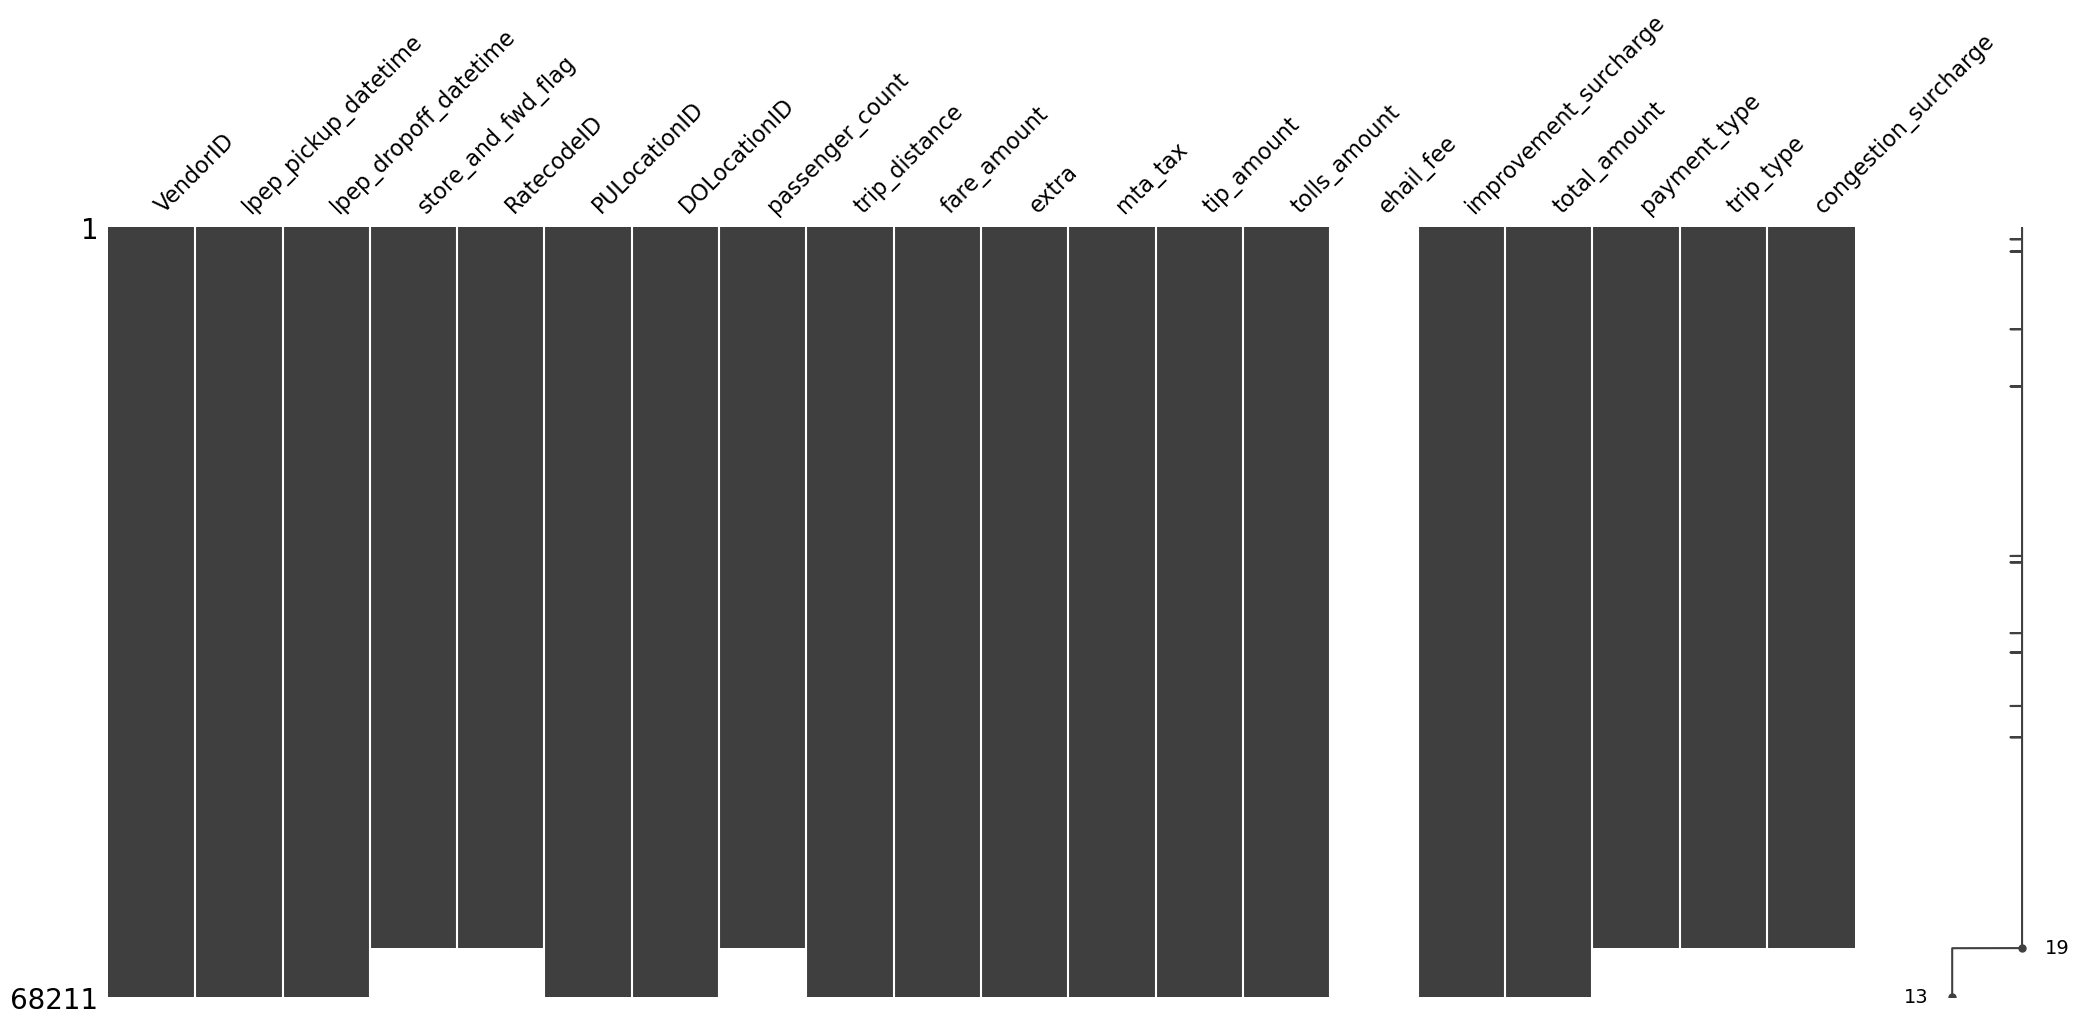

In [487]:
msno.matrix(trips)
plt.show()

Based on the matrix, we found that there are several columns having missing values, such as store_and_fwd_flag, rate_code_id, and trip_type. The next step is to check the percentage of missing values in each column.

In [488]:
trips_missing = pd.DataFrame(trips.isnull().sum(), columns=["Missing Value Counts"])
trips_missing["Percentage (%)"] = (trips_missing["Missing Value Counts"] / len(trips))  100
trips_missing["Type"] = trips.dtypes
trips_missing[trips_missing["Percentage (%)"]!=0]

SyntaxError: invalid syntax (3833259241.py, line 2)

There are 7 columns those having missing values. Most of them have the percentage of 6.34%, except ehail_fee and trip_type. The ehail_fee is a missing completely at random (MCAR) column. It means that the missing values are not related to any other variables in the dataset. Because of that, we will drop this column.

In [ ]:
trips = trips.drop(columns=["ehail_fee"])

Thestore_and_fwd_flag, payment_type, passenger_count, and congestion_surcharge columns are missing at random (MAR) columns. It means that the missing values are related to other variables in the dataset. We will check the normality of these columns to decide the which central of tendecy imputations are suitable. 

For categorical columns, we will impute the missing values with the mode. Although the RatecodeID is considered as the numerical value, but it is actually categorical value. This approach will be applied for store_and_fwd_flag, RatecodeID, and payment_type.

For numerical columns, if they are normal, then we will impute the missing values with the median. Otherwise, we will impute these missing values with the mean. This approach will be applied to passenger_count and congestion_surcharge.

In [ ]:
categoricals = ["store_and_fwd_flag", "RatecodeID", "payment_type"]
for column in categoricals:
    trips[column] = trips[column].fillna(trips[column].mode()[0])

After filling these categorical values with mode, we will see the distribution for the numerical columns.

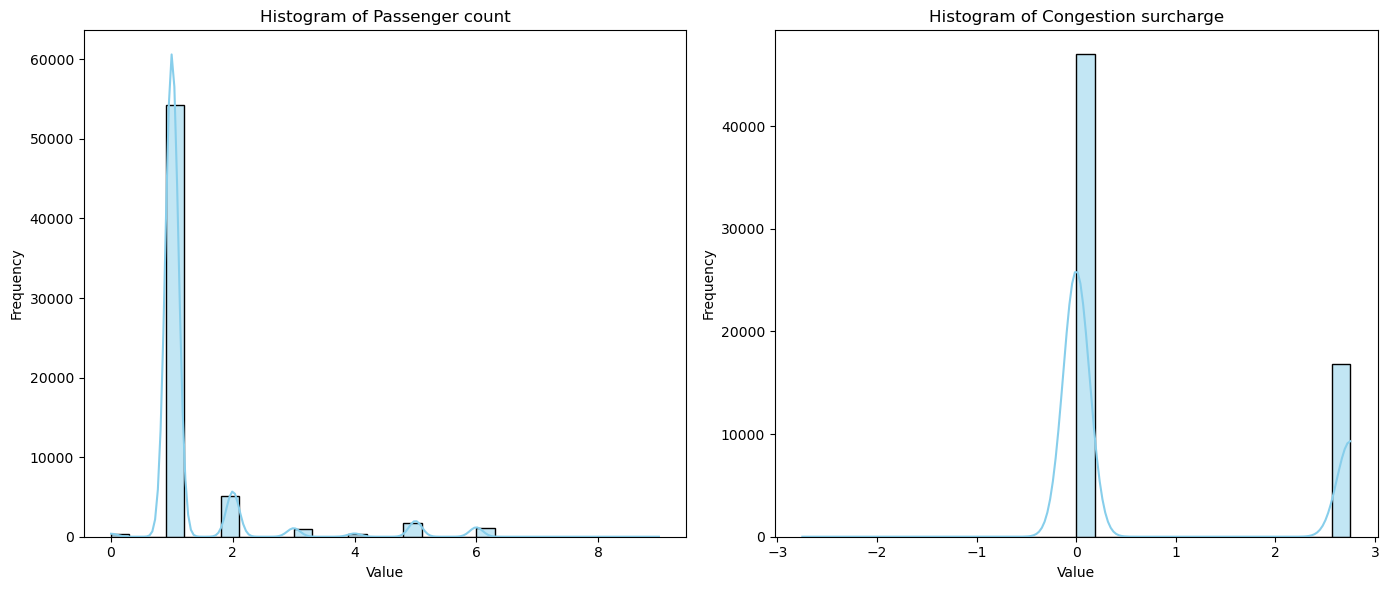

In [ ]:
# Define the columns to plot
columns_to_plot = ["passenger_count", "congestion_surcharge"]

# Create a figure and a set of subplots
ncols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(14, 6))

# Loop through each column and create a histogram subplot
for ax, column in zip(axes, columns_to_plot):
    # Plot the histogram with a KDE overlay
    sns.histplot(trips[column], bins=30, kde=True, color="skyblue", ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f"Histogram of {column.capitalize().replace('_', ' ')}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

After seeing the histogram, we can conclude that the passenger_count and congestion_surcharge columns are not normally distributed. Let's deep dive the data to see the distribution of these columns.

In [ ]:
trips_describe = trips[["passenger_count", "congestion_surcharge"]].describe().reset_index()
trips_describe.loc[len(trips_describe)] = ["skewness", trips_describe["passenger_count"].skew(), trips_describe["congestion_surcharge"].skew()]
trips_describe.loc[len(trips_describe)] = ["kurtosis", trips_describe["passenger_count"].kurtosis(), trips_describe["congestion_surcharge"].kurtosis()]
trips_describe

,index,passenger_count,congestion_surcharge
0,count,63887.00,63887.00
1,mean,1.32,0.73
2,std,0.98,1.21
3,min,0.00,-2.75
4,25%,1.00,0.00
5,50%,1.00,0.00
6,75%,1.00,2.75
7,max,9.00,2.75
8,skewness,2.83,2.83
9,kurtosis,9.00,9.00


In [ ]:
# Create The Function For Normality Test
def determine_normality(column_name, skewness, kurtosis):
    # Determine skewness classification
    if skewness < -1:
        skewness_classification = "left-skewed"
    elif skewness > 1:
        skewness_classification = "right-skewed"
    else:
        skewness_classification = "approximately symmetrical"

    # Determine kurtosis classification
    if kurtosis > 3:
        kurtosis_classification = "leptokurtic"
    elif kurtosis < 3:
        kurtosis_classification = "platykurtic"
    else:
        kurtosis_classification = "mesokurtic"

    # Determine normality classification
    if skewness_classification == "approximately symmetrical" and kurtosis_classification == "mesokurtic":
        normality_classification = "approximately normal"
    else:
        normality_classification = "non-normal"

    return dict(column_name = column_name, normality = normality_classification, skewness =  skewness_classification, kurtosis = kurtosis_classification)

In [ ]:
passenger_count_normality = determine_normality("passenger_count", trips_describe.iloc[8, 1], trips_describe.iloc[8, 2])
congestion_surcharge_normality = determine_normality("congestion_surcharge", trips_describe.iloc[9, 1], trips_describe.iloc[9, 2])
pd.DataFrame([passenger_count_normality, congestion_surcharge_normality])

,column_name,normality,skewness,kurtosis
0,passenger_count,non-normal,right-skewed,platykurtic
1,congestion_surcharge,non-normal,right-skewed,leptokurtic


Both of these column names are not normal and right-skewed. But, the difference is only in their kurtosis, where passenger_count is platykurtic and congestion_surcharge is leptokurtic. Because of that, we will impute these numerical missing values with the median.

In [ ]:
numericals = ["passenger_count", "congestion_surcharge"]
for column in numericals:
    trips[column] = trips[column].fillna(trips[column].median())

Although the difference is only 0.01% among of the most columns, the store_and_fwd_flag column is a missing not at random (MNAR) column. This column is considered as categorical values, so we will impute the missing values with the mode imputation.

In [ ]:
trips["trip_type"] = trips["trip_type"].fillna(trips["trip_type"].mode()[0])

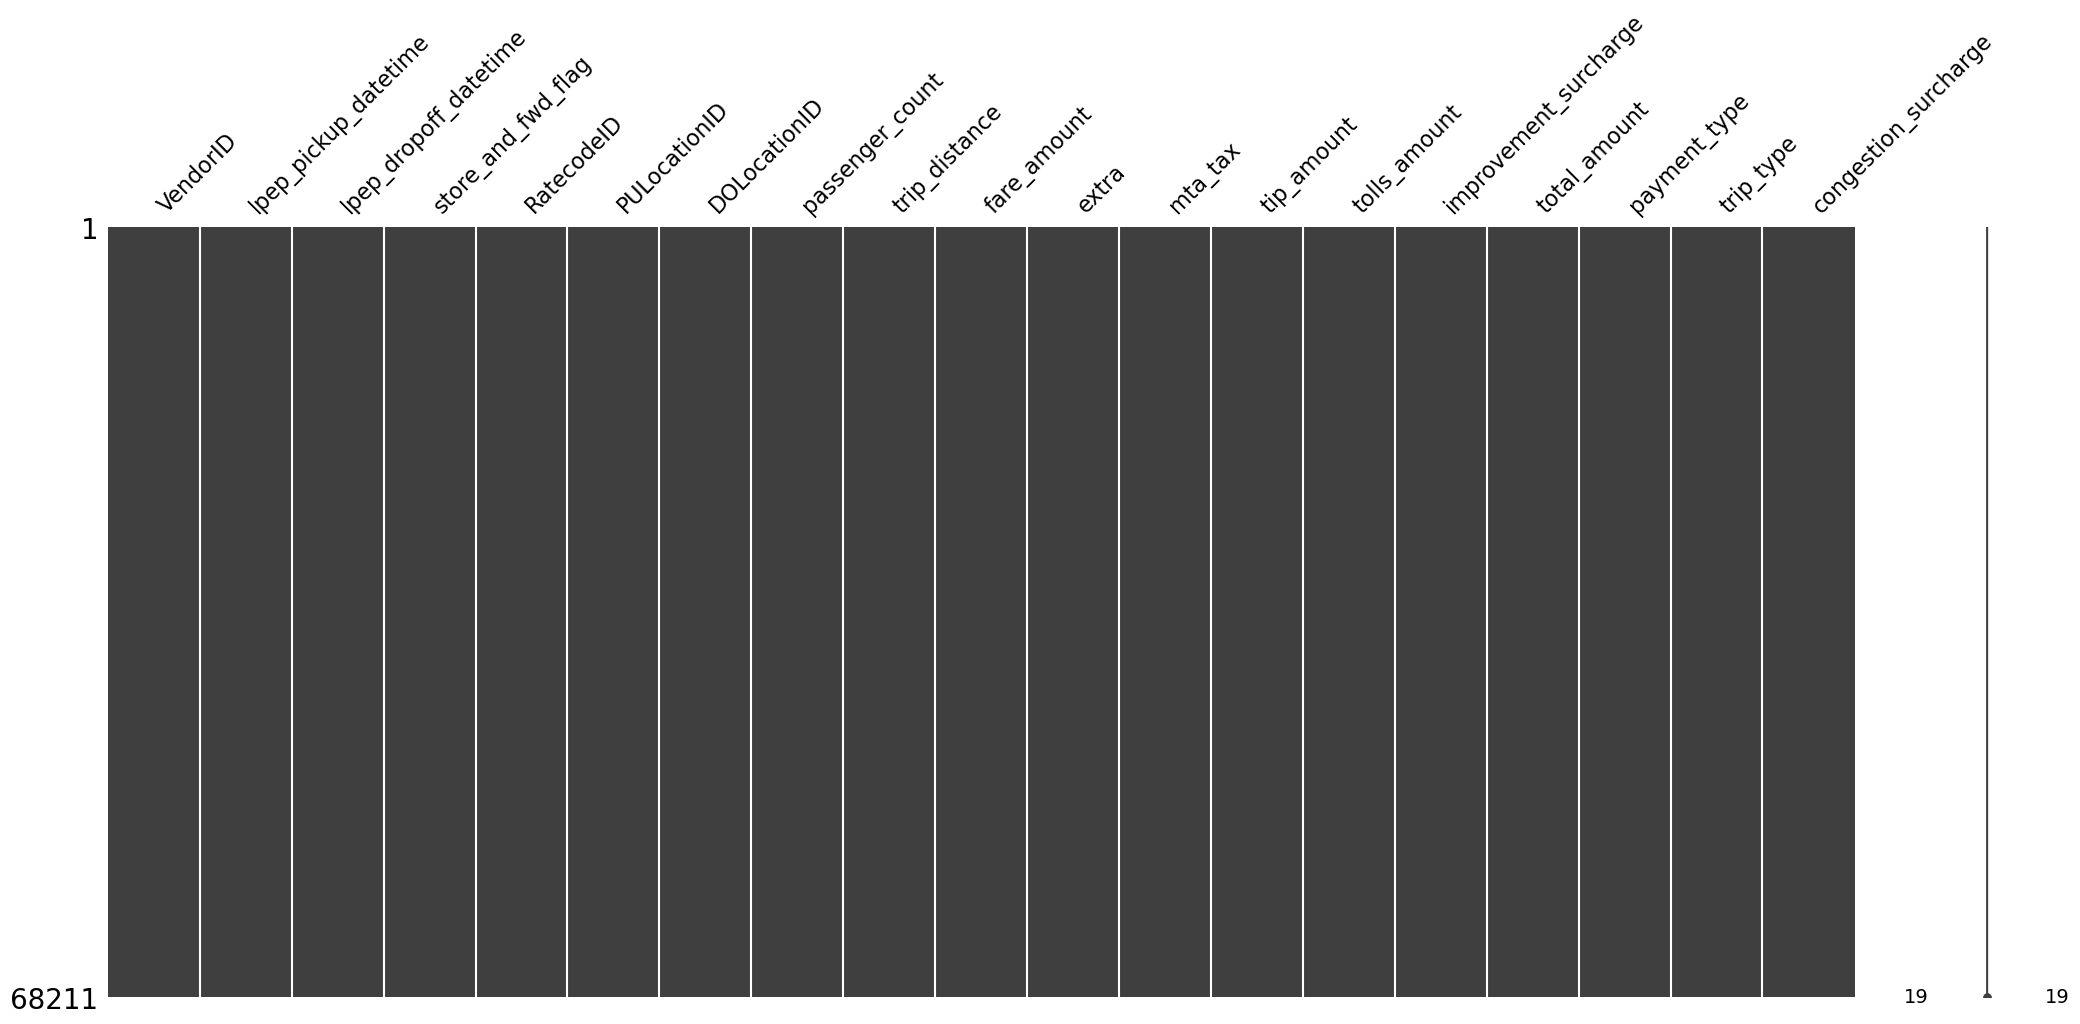

In [ ]:
msno.matrix(trips)
plt.show()

#### Zones Dataset


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

In [ ]:
zones.isnull().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [ ]:
zones[zones["Borough"].isnull()]

,LocationID,Borough,Zone,service_zone
264,265,NaN,Outside of NYC,NaN


In [ ]:
zones[zones["Zone"].isnull()]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN


In [ ]:
zones[zones["service_zone"].isnull()]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


In [ ]:
zones.isnull().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [ ]:
zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
zones = zones.fillna("Unknown")

### Outlier Detection Analysis

Outliers may create a bias for decision-making. Because of that, we need to detect the outliers in the dataset. Let's see the boxplot distributions for each columns.

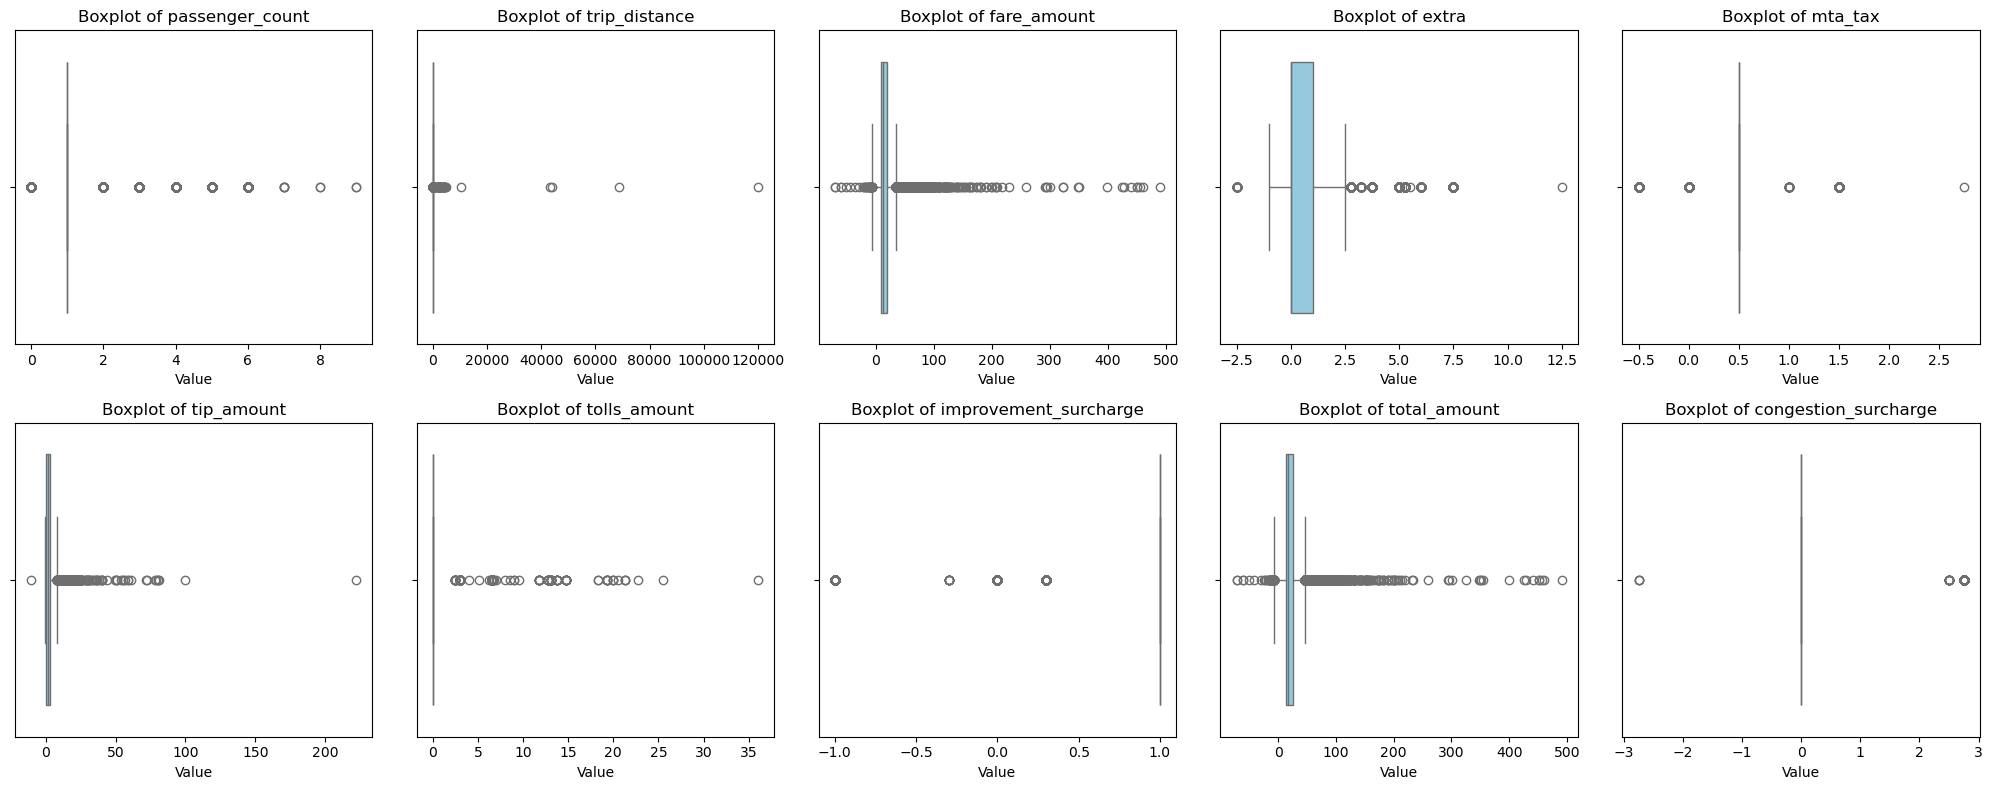

In [ ]:
# Define the columns to plot
columns_to_plot = [column for column in trips.columns if trips[column].dtype in ["float64", "int64"] if "ID" not in column and "type" not in column]

# Create a figure and a set of subplots (2 rows and 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Loop through each column and create a boxplot subplot
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(x=trips[column], ax=ax, color="skyblue")
    ax.set_title(f"Boxplot of {column}")
    ax.set_xlabel("Value")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [ ]:
trips_describe = trips[columns_to_plot].describe().reset_index()
trips_describe

,index,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,count,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00
1,mean,1.30,8.11,16.60,0.83,0.59,2.14,0.17,0.95,21.79,0.68
2,std,0.95,585.11,13.47,1.27,0.39,3.05,1.10,0.20,15.46,1.19
3,min,0.00,0.00,-70.00,-2.50,-0.50,-10.50,0.00,-1.00,-71.50,-2.75
4,25%,1.00,1.11,9.30,0.00,0.50,0.00,0.00,1.00,12.90,0.00
5,50%,1.00,1.85,13.50,0.00,0.50,1.60,0.00,1.00,17.90,0.00
6,75%,1.00,3.21,19.80,1.00,0.50,3.33,0.00,1.00,26.15,0.00
7,max,9.00,120098.84,490.00,12.50,2.75,222.22,36.05,1.00,491.00,2.75


There are no iqr, upper bound, and lower bound threshold. We will enrich the rows based on these 3 informations. We will create the functions to calculate these 3 values, because we will use them also for removing the outliers.

In [ ]:
def return_iqr_lb_ub(column):
    q1 = trips[column].quantile(0.25)
    q3 = trips[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5  iqr
    upper_bound = q3 + 1.5  iqr
    return dict(iqr = iqr, lower_bound = lower_bound, upper_bound = upper_bound)

For each numerical columns, we will put these values into the descriptive DataFrame.

In [ ]:
numericals = trips[columns_to_plot].columns
iqr_list = ["iqr"]
lower_bound_list = ["lower_bound"]
upper_bound_list = ["upper_bound"]
for column in numericals:
    iqr_lb_ub = return_iqr_lb_ub(column)
    iqr_list.append(iqr_lb_ub["iqr"])
    lower_bound_list.append(iqr_lb_ub["lower_bound"])
    upper_bound_list.append(iqr_lb_ub["upper_bound"])

trips_describe.loc[len(trips_describe)] = iqr_list
trips_describe.loc[len(trips_describe)] = lower_bound_list
trips_describe.loc[len(trips_describe)] = upper_bound_list

trips_describe

,index,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,count,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00
1,mean,1.30,8.11,16.60,0.83,0.59,2.14,0.17,0.95,21.79,0.68
2,std,0.95,585.11,13.47,1.27,0.39,3.05,1.10,0.20,15.46,1.19
3,min,0.00,0.00,-70.00,-2.50,-0.50,-10.50,0.00,-1.00,-71.50,-2.75
4,25%,1.00,1.11,9.30,0.00,0.50,0.00,0.00,1.00,12.90,0.00
5,50%,1.00,1.85,13.50,0.00,0.50,1.60,0.00,1.00,17.90,0.00
6,75%,1.00,3.21,19.80,1.00,0.50,3.33,0.00,1.00,26.15,0.00
7,max,9.00,120098.84,490.00,12.50,2.75,222.22,36.05,1.00,491.00,2.75
8,iqr,0.00,2.10,10.50,1.00,0.00,3.33,0.00,0.00,13.25,0.00
9,lower_bound,1.00,-2.04,-6.45,-1.50,0.50,-5.00,0.00,1.00,-6.97,0.00


### Insights for outliers:

•	passenger_count: 
-	The bounds range from 0.00 to 0.00. Since both bounds are equal, any value different from 0.00 is considered an outlier.

•	trip_distance: 
-	The bounds range from -2.04 to 6.36. If this value is outside the bounds range, then it is considered an outlier.

•	fare_amount: 
-	The bounds range from -6.45 to 35.55. If this value is outside the bounds range, then it is considered an outlier.

•	extra: 
-	The bounds range from -1.50 to 2.50. If this value is outside the bounds range, then it is considered an outlier.

•	mta_tax: 
-	The bounds range from 0.50 to 0.50. Since both bounds are equal, any value different from 0.50 is considered an outlier.

•	tip_amount: 
-	The bounds range from -4.995 to 8.325. If this value is outside the bounds range, then it is considered an outlier.

•	tolls_amount: 
-	The bounds range from 0.00 to 0.00. Since both bounds are equal, any value different from 0.00 is considered an outlier.

•	improvement_surcharge: 
-	The bounds range from 1.00 to 1.00. Since both bounds are equal, any value different from 1.00 is considered an outlier.

•	total_amount: 
-	The bounds range from -6.975 to 46.025. If this value is outside the bounds range, then it is considered an outlier.

•	congestion_surcharge: 
-	The bounds range from 0.00 to 0.00. Since both bounds are equal, any value different from 0.00 is considered an outlier.

In [ ]:
trips2 = trips.copy()
numericals = [column for column in trips2.columns if trips2[column].dtype in ["float64", "int64"]]
# Outlier Removal
for column in numericals:
    iqr_lb_ub = return_iqr_lb_ub(column)
    lower_bound = iqr_lb_ub["lower_bound"]
    upper_bound = iqr_lb_ub["upper_bound"]
    
    trips2 = trips2[(trips2[column] > lower_bound) & (trips2[column] < upper_bound)]
trips2.shape

(0, 19)

It turns out that when removing the outliers, all rows are cleaned up.

In [ ]:
trips.shape

(68211, 19)

### Conclusion And Recommendations For Outliers

Meanwhile, comparing to the dataset before removing the outliers, all the rows are still available. Because of that, removing outliers is not suitable in this case and we will use the dataset with outliers.

## Structure

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

### Renaming The Columns
 All of the columns are not uniformly named, so it is necessary to rename the columns to make it easier to understand. Also, there are some columns that have missing values there. The first step that we can do is to rename the columns Into snake_case Convention Based on PEP8 Standards.

#### Trips Dataset

In [ ]:
# Create the dictionary for renaming the columns
rename_trip_columns = {
    "VendorID": "vendor_id",
    "tpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "RatecodeID": "rate_code_id",
    "store_and_fwd_flag": "store_and_fwd_flag",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "payment_type": "payment_type",
    "fare_amount": "fare_amount",
    "extra": "extra",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "congestion_surcharge": "congestion_surcharge",
    "Trip_type": "trip_type"
}

# Rename the columns - Trips
trips = trips.rename(columns=rename_trip_columns)
trips.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00


#### Zones Dataset

In [ ]:
# Create the dictionary for renaming the columns
rename_zone_columns = {
    "LocationID":"location_id",
    "Borough":"borough",
    "Zone": "zone",
    "service_zone": "service_zone"
}

# Rename the columns - Zones
zones = zones.rename(columns=rename_zone_columns)
zones.head()

,location_id,borough,zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


After successfully renamed the columns into snake_case convention, let's convert the needed data types of the columns to more suitable ones.

### Data Types Conversion

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc et sem in diam tempus sollicitudin. Nunc ultricies orci ac sem volutpat tincidunt. Nullam dignissim diam a erat pellentesque congue. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque euismod eget purus in viverra. Duis in tellus ante. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nam feugiat ex magna, a fringilla ligula gravida vitae. Donec ornare non odio bibendum volutpat. Vivamus dignissim leo et mauris lobortis pellentesque. Proin non ante dui. Ut ac efficitur purus, at rhoncus elit. Nullam erat urna, tincidunt vitae tincidunt non, fermentum vitae odio. Fusce sed vestibulum libero. Aenean eu porttitor urna.

#### Trips Dataset

In [ ]:
# Convert Datetime Columns Into Datetime Type For Trips
trips_datetimes = ["lpep_pickup_datetime", "lpep_dropoff_datetime"]
for column in trips_datetimes:
    trips[column] = pd.to_datetime(trips[column])

In [ ]:
# Convert Categorical Columns Into Category Type For Trips
trips_categoricals = ["vendor_id", "store_and_fwd_flag", "rate_code_id", "payment_type", "trip_type", "pickup_location_id", "dropoff_location_id"]
for column in trips_categoricals:
    trips[column] = trips[column].astype("category")

#### Zones Dataset

In [ ]:
# Convert Categorical Columns Into Category Type For Zones
zones_categoricals = [column for column in zones.columns]
for column in zones_categoricals:
    zones[column] = zones[column].astype("category")

## Enrich

### Calculate Trip Duration In Minutes

The trip duration is calculated by subtracting the dropoff datetime with the pickup datetime. The result is in the form of timedelta. We will convert this timedelta into minutes.

In [ ]:
trips["trip_duration_minutes"] = (trips["lpep_dropoff_datetime"] - trips["lpep_pickup_datetime"]).dt.total_seconds() / 60
trips["trip_duration_minutes"] = round(trips["trip_duration_minutes"], 2)

In [ ]:
trips.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_minutes
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97


### Extract Hour, Day Of Week, And Month From Pickup Datetime

The pickup datetime is in the form of datetime. We will extract the hour, day of week, and month from this column.

In [ ]:
trips["pickup_hour"] = trips["lpep_pickup_datetime"].dt.hour
trips["pickup_day_of_week"] = trips["lpep_pickup_datetime"].dt.dayofweek
trips["pickup_month"] = trips["lpep_pickup_datetime"].dt.month

In [ ]:
trips.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_minutes,pickup_hour,pickup_day_of_week,pickup_month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1


### Mapping The Name Based On Identifier

To enhance the analysis, the ID mapping is needed. So, when taking the insights, the label category shows as name instead of ID.

#### New York City TLC Trip Record Data Dictionary.pdf Based

Lorem ipsum dolor sit amet, consectetur adipiscing elit. In auctor dolor id interdum convallis. Nam quis nisi vestibulum, viverra enim in, feugiat magna. Vivamus in sapien sed mi eleifend fringilla eget in orci. Mauris a elementum felis, sed maximus nibh. Vestibulum eu tellus eu turpis rhoncus posuere. In sagittis, lacus et volutpat porttitor, nisl nulla aliquet lacus, at lobortis ligula ligula at orci. Duis neque urna, ullamcorper ac lectus et, porttitor facilisis nibh. Morbi ut velit fringilla, aliquet eros nec, convallis odio. Vivamus malesuada blandit risus ac tristique. Nullam tortor tellus, porta id sodales vitae, sollicitudin in massa. Integer sit amet nulla et nibh vehicula gravida ut quis eros. Sed ultricies nec lorem et maximus. Sed fringilla, purus lobortis euismod tempus, massa nisl finibus urna, quis lobortis nunc justo non felis. Sed sit amet tempor mi, sit amet dictum nisi. In pharetra leo nisi, ac luctus metus laoreet ut. Integer eget leo ut arcu euismod vestibulum.

In [ ]:
# Create vendor_id to vendor_name Dictionary
vendor_mapping = {
    1: "Creative Mobile Technologies, LLC.",
    2: "VeriFone Inc."
}

# Create rate_code_id to rate_code_name Dictionary
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride",
    99: "Unknown"
}

# Create store_and_fwd_flag to store_and_fwd_flag_name Dictionary
store_and_fwd_mapping = {
    "Y": "Store and Forward Trip",
    "N": "Not A Store and Forward Trip",
}

# Create payment_type to payment_type_name Dictionary
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}

# Create trip_type to trip_type_name Dictionary
trip_type_mapping = {
    1: "Street-hail",
    2: "Dispatch"
}

# Map The Columns Based on Created Dictionaries
trips["vendor_name"] = trips["vendor_id"].map(vendor_mapping)
trips["rate_code_name"] = trips["rate_code_id"].map(rate_code_mapping)
trips["store_and_fwd_flag_name"] = trips["store_and_fwd_flag"].map(store_and_fwd_mapping)
trips["payment_type_name"] = trips["payment_type"].map(payment_type_mapping)
trips["trip_type_name"] = trips["trip_type"].map(trip_type_mapping)

#### Zones Dataset Based

Lorem ipsum dolor sit amet, consectetur adipiscing elit. In auctor dolor id interdum convallis. Nam quis nisi vestibulum, viverra enim in, feugiat magna. Vivamus in sapien sed mi eleifend fringilla eget in orci. Mauris a elementum felis, sed maximus nibh. Vestibulum eu tellus eu turpis rhoncus posuere. In sagittis, lacus et volutpat porttitor, nisl nulla aliquet lacus, at lobortis ligula ligula at orci. Duis neque urna, ullamcorper ac lectus et, porttitor facilisis nibh. Morbi ut velit fringilla, aliquet eros nec, convallis odio. Vivamus malesuada blandit risus ac tristique. Nullam tortor tellus, porta id sodales vitae, sollicitudin in massa. Integer sit amet nulla et nibh vehicula gravida ut quis eros. Sed ultricies nec lorem et maximus. Sed fringilla, purus lobortis euismod tempus, massa nisl finibus urna, quis lobortis nunc justo non felis. Sed sit amet tempor mi, sit amet dictum nisi. In pharetra leo nisi, ac luctus metus laoreet ut. Integer eget leo ut arcu euismod vestibulum.

In [ ]:
borough_mapping = dict(zip(zones["location_id"], zones["borough"]))
zone_mapping = dict(zip(zones["location_id"], zones["zone"]))
service_zone_mapping = dict(zip(zones["location_id"], zones["service_zone"]))

trips["pickup_borough"] = trips["pickup_location_id"].map(borough_mapping)
trips["pickup_zone"] = trips["pickup_location_id"].map(zone_mapping)
trips["pickup_service_zone"] = trips["pickup_location_id"].map(service_zone_mapping)

trips["dropoff_borough"] = trips["dropoff_location_id"].map(borough_mapping)
trips["dropoff_zone"] = trips["dropoff_location_id"].map(zone_mapping)
trips["dropoff_service_zone"] = trips["dropoff_location_id"].map(service_zone_mapping)

In [ ]:
trips.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_minutes,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


## Validate

Lorem ipsum dolor sit amet, consectetur adipiscing elit. In auctor dolor id interdum convallis. Nam quis nisi vestibulum, viverra enim in, feugiat magna. Vivamus in sapien sed mi eleifend fringilla eget in orci. Mauris a elementum felis, sed maximus nibh. Vestibulum eu tellus eu turpis rhoncus posuere. In sagittis, lacus et volutpat porttitor, nisl nulla aliquet lacus, at lobortis ligula ligula at orci. Duis neque urna, ullamcorper ac lectus et, porttitor facilisis nibh. Morbi ut velit fringilla, aliquet eros nec, convallis odio. Vivamus malesuada blandit risus ac tristique. Nullam tortor tellus, porta id sodales vitae, sollicitudin in massa. Integer sit amet nulla et nibh vehicula gravida ut quis eros. Sed ultricies nec lorem et maximus. Sed fringilla, purus lobortis euismod tempus, massa nisl finibus urna, quis lobortis nunc justo non felis. Sed sit amet tempor mi, sit amet dictum nisi. In pharetra leo nisi, ac luctus metus laoreet ut. Integer eget leo ut arcu euismod vestibulum.

### Convert rate_code_id and passenger_count from Float To Integer

We won't remove the ID columns because it may be useful in the future use. But seeing the rate_code_id and passenger_count are not consistent because the label categories are integer instead of float. So, we need to convert them into integer.

In [ ]:
for column in ["rate_code_id", "passenger_count"]:
    trips[column] = trips[column].apply(lambda x: int(x))

In [ ]:
trips.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_minutes,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


In [ ]:
# Sort the DataFrame by lpep_pickup_datetime
trips = trips.sort_values(by="lpep_pickup_datetime", ascending=True)

## Publish
Lorem ipsum dolor sit amet, consectetur adipiscing elit. In auctor dolor id interdum convallis. Nam quis nisi vestibulum, viverra enim in, feugiat magna. Vivamus in sapien sed mi eleifend fringilla eget in orci. Mauris a elementum felis, sed maximus nibh. Vestibulum eu tellus eu turpis rhoncus posuere. In sagittis, lacus et volutpat porttitor, nisl nulla aliquet lacus, at lobortis ligula ligula at orci. Duis neque urna, ullamcorper ac lectus et, porttitor facilisis nibh. Morbi ut velit fringilla, aliquet eros nec, convallis odio. Vivamus malesuada blandit risus ac tristique. Nullam tortor tellus, porta id sodales vitae, sollicitudin in massa. Integer sit amet nulla et nibh vehicula gravida ut quis eros. Sed ultricies nec lorem et maximus. Sed fringilla, purus lobortis euismod tempus, massa nisl finibus urna, quis lobortis nunc justo non felis. Sed sit amet tempor mi, sit amet dictum nisi. In pharetra leo nisi, ac luctus metus laoreet ut. Integer eget leo ut arcu euismod vestibulum.

## Save The Cleaned Dataset To .csv File

The clean dataset is saved for later use for explanatory data analysis use.

In [ ]:
trips.to_csv("NYC TLC Trip Record - Clean.csv", index=False, sep = ";")

In [ ]:
zones.to_csv("taxi_zone_lookup - Clean.csv", index=False, sep = ";")

# Exploratory Data Analysis (EDA)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque id sollicitudin libero. Praesent imperdiet odio lacinia neque sollicitudin, eu faucibus mauris lacinia. Ut sed lectus ultrices, sodales massa sit amet, placerat diam. Interdum et malesuada fames ac ante ipsum primis in faucibus. Mauris leo massa, fermentum placerat risus non, iaculis vehicula nunc. Morbi sit amet pulvinar elit, in euismod purus. Nunc pulvinar nec ante vitae luctus. Donec vel ipsum elit.

In [489]:
pass